# Coursera capstone project

Notebook used for coursera capstone

In [1]:
import pandas as pd
import numpy as np

In [2]:
print('Hello Cpastone Project Course!')

Hello Cpastone Project Course!


## Introduction/Business problem 

I will be using the data collisions dataset provided to predict the severity of the accident. 

In [81]:
read_path = r'D:\Data Collision\\'
read_file = r'Data-Collisions.csv'
df = pd.read_csv(read_path+read_file)
df

C:\Users\sumai\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


In [82]:
df['SEVERITYCODE'].unique()

array([2, 1], dtype=int64)

## Data

I will be using the data provided and a sample is shown above. and we will be trying to predict the accident severity code. 

## Exploring the data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [5]:
cols_to_keep1 = ['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT','VEHCOUNT','INATTENTIONIND','UNDERINFL','WEATHER', 'ROADCOND', 'LIGHTCOND','PEDROWNOTGRNT','SPEEDING']

Columns above chosen based on first pass of the descriptoin file

In [6]:
df2 = df[cols_to_keep1]
df2

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
0,2,Intersection,Angles,2,0,0,2,NaN,N,Overcast,Wet,Daylight,NaN,NaN
1,1,Block,Sideswipe,2,0,0,2,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN
2,1,Block,Parked Car,4,0,0,3,NaN,0,Overcast,Dry,Daylight,NaN,NaN
3,1,Block,Other,3,0,0,3,NaN,N,Clear,Dry,Daylight,NaN,NaN
4,2,Intersection,Angles,2,0,0,2,NaN,0,Raining,Wet,Daylight,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,Block,Head On,3,0,0,2,NaN,N,Clear,Dry,Daylight,NaN,NaN
194669,1,Block,Rear Ended,2,0,0,2,Y,N,Raining,Wet,Daylight,NaN,NaN
194670,2,Intersection,Left Turn,3,0,0,2,NaN,N,Clear,Dry,Daylight,NaN,NaN
194671,2,Intersection,Cycles,2,0,1,1,NaN,N,Clear,Dry,Dusk,NaN,NaN


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    194673 non-null  int64 
 1   ADDRTYPE        192747 non-null  object
 2   COLLISIONTYPE   189769 non-null  object
 3   PERSONCOUNT     194673 non-null  int64 
 4   PEDCOUNT        194673 non-null  int64 
 5   PEDCYLCOUNT     194673 non-null  int64 
 6   VEHCOUNT        194673 non-null  int64 
 7   INATTENTIONIND  29805 non-null   object
 8   UNDERINFL       189789 non-null  object
 9   WEATHER         189592 non-null  object
 10  ROADCOND        189661 non-null  object
 11  LIGHTCOND       189503 non-null  object
 12  PEDROWNOTGRNT   4667 non-null    object
 13  SPEEDING        9333 non-null    object
dtypes: int64(5), object(9)
memory usage: 20.8+ MB


### Dealing with missing values

Here I will go through each column, explore it a bit more to understand it and see how we can fill in missing values or if there is another way. 

For the following columns, it would be better to drop the missing values as there is no way to know what the missing values are or I believe we will be adding/subtracting information

In [8]:
df2['ADDRTYPE'].unique()

array(['Intersection', 'Block', 'Alley', nan], dtype=object)

In [9]:
df2['COLLISIONTYPE'].unique()

array(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', nan, 'Left Turn', 'Pedestrian',
       'Right Turn'], dtype=object)

For the below columns I will be looking at potentially filling the null objects. Each column will be described. 

In [33]:
df2['INATTENTIONIND'].unique()
df2['INATTENTIONIND'].fillna('N', inplace= True)

Since it is only Y or nan, I will assume that nan can be mapped to No. I believe this is reasonable because it really is a binary classifcation 

In [11]:
df2['UNDERINFL'].unique()

array(['N', '0', nan, '1', 'Y'], dtype=object)

I will assume that 0 maps to N and 1 maps to Y. I will also make the default assumption that nan maps to N

In [34]:
df2['UNDERINFL'].fillna('N', inplace = True)

In [12]:
df2['WEATHER'].unique()

array(['Overcast', 'Raining', 'Clear', nan, 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

I will map nan to clear. As my default assumption will be that it is a clear weather. 

In [35]:
df2['WEATHER'].fillna('Clear', inplace = True)

In [13]:
df2['ROADCOND'].unique()

array(['Wet', 'Dry', nan, 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

I will map nan to unknown, as the default assumption for me is that the road conditions. 

In [36]:
df2['ROADCOND'].fillna('Unknown', inplace = True)

In [14]:
df2['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       nan, 'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off',
       'Other', 'Dark - Unknown Lighting'], dtype=object)

I will map the nan to to daylight, as we will assume that ppl generally drive in the day 

In [38]:
df2['LIGHTCOND'].fillna('Daylight', inplace = True)

In [39]:
df2['PEDROWNOTGRNT'].unique()

array([nan, 'Y'], dtype=object)

Will assume nan means no 

In [40]:
df2['PEDROWNOTGRNT'].fillna('N', inplace = True)

In [41]:
df2['SPEEDING'].unique()

array([nan, 'Y'], dtype=object)

assume that nan will mean no here. 

In [43]:
df2['SPEEDING'].fillna('N', inplace = True)

In [44]:
df3 = df2[df2['ADDRTYPE'].notna()]
df3 = df3[df3['COLLISIONTYPE'].notna()]
df3

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
0,2,Intersection,Angles,2,0,0,2,N,N,Overcast,Wet,Daylight,N,N
1,1,Block,Sideswipe,2,0,0,2,N,0,Raining,Wet,Dark - Street Lights On,N,N
2,1,Block,Parked Car,4,0,0,3,N,0,Overcast,Dry,Daylight,N,N
3,1,Block,Other,3,0,0,3,N,N,Clear,Dry,Daylight,N,N
4,2,Intersection,Angles,2,0,0,2,N,0,Raining,Wet,Daylight,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,Block,Head On,3,0,0,2,N,N,Clear,Dry,Daylight,N,N
194669,1,Block,Rear Ended,2,0,0,2,Y,N,Raining,Wet,Daylight,N,N
194670,2,Intersection,Left Turn,3,0,0,2,N,N,Clear,Dry,Daylight,N,N
194671,2,Intersection,Cycles,2,0,1,1,N,N,Clear,Dry,Dusk,N,N


In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187950 entries, 0 to 194672
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    187950 non-null  int64 
 1   ADDRTYPE        187950 non-null  object
 2   COLLISIONTYPE   187950 non-null  object
 3   PERSONCOUNT     187950 non-null  int64 
 4   PEDCOUNT        187950 non-null  int64 
 5   PEDCYLCOUNT     187950 non-null  int64 
 6   VEHCOUNT        187950 non-null  int64 
 7   INATTENTIONIND  187950 non-null  object
 8   UNDERINFL       187950 non-null  object
 9   WEATHER         187950 non-null  object
 10  ROADCOND        187950 non-null  object
 11  LIGHTCOND       187950 non-null  object
 12  PEDROWNOTGRNT   187950 non-null  object
 13  SPEEDING        187950 non-null  object
dtypes: int64(5), object(9)
memory usage: 21.5+ MB


The data set has no na values but a lot of categorical values. I will turn these into numbers by adding columns for the unique values into different columns. One hot enconding

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [63]:
def one_hot_encoder_cleaner(data_df, column, out_df):
    enc = OneHotEncoder()
    A = pd.DataFrame(enc.fit_transform(data_df[[column]]).toarray())
    out_df = out_df.join(A)
    
    return (out_df)


In [67]:
encode_columns = [ 'ADDRTYPE',
 'COLLISIONTYPE',
 'INATTENTIONIND',
 'UNDERINFL',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'PEDROWNOTGRNT',
 'SPEEDING']

eenc = OneHotEncoder()
A = pd.DataFrame(enc.fit_transform(df3[encode_columns]).toarray())
A

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187945,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
187946,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
187947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
187948,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [68]:
other_cols = ['SEVERITYCODE',
 'PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT']
df4 = df3[other_cols]
ml_df = df4.join(A)
ml_df

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,0,1,2,3,4,...,42,43,44,45,46,47,48,49,50,51
0,2,2,0,0,2,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,2,0,0,2,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1,4,0,0,3,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,3,0,0,3,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2,2,0,0,2,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,3,0,0,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194669,1,2,0,0,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194670,2,3,0,0,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194671,2,2,0,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
ml_df.describe()


,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,0,1,2,3,4,...,42,43,44,45,46,47,48,49,50,51
count,187950.000000,187950.000000,187950.000000,187950.000000,187950.000000,181788.000000,181788.000000,181788.000000,181788.000000,181788.000000,...,181788.000000,181788.000000,181788.000000,181788.000000,181788.000000,181788.000000,181788.000000,181788.000000,181788.000000,181788.000000
mean,1.303150,2.462926,0.038441,0.029300,1.970322,0.003933,0.658718,0.337349,0.183615,0.028583,...,0.000039,0.013307,0.614276,0.031119,0.001205,0.067518,0.975064,0.024936,0.950382,0.049618
std,0.459621,1.359520,0.201475,0.169999,0.559647,0.062592,0.474141,0.472806,0.387171,0.166631,...,0.006205,0.114585,0.486767,0.173639,0.034688,0.250918,0.155929,0.155929,0.217156,0.217156
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,2.000000,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,2.000000,81.000000,6.000000,2.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
ml_df.dropna(inplace = True)
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181788 entries, 0 to 187949
Data columns (total 57 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   SEVERITYCODE  181788 non-null  int64  
 1   PERSONCOUNT   181788 non-null  int64  
 2   PEDCOUNT      181788 non-null  int64  
 3   PEDCYLCOUNT   181788 non-null  int64  
 4   VEHCOUNT      181788 non-null  int64  
 5   0             181788 non-null  float64
 6   1             181788 non-null  float64
 7   2             181788 non-null  float64
 8   3             181788 non-null  float64
 9   4             181788 non-null  float64
 10  5             181788 non-null  float64
 11  6             181788 non-null  float64
 12  7             181788 non-null  float64
 13  8             181788 non-null  float64
 14  9             181788 non-null  float64
 15  10            181788 non-null  float64
 16  11            181788 non-null  float64
 17  12            181788 non-null  float64
 18  13  

In [86]:
all_cols = ml_df.columns.tolist()
target = all_cols[0]
feats = all_cols[1:]

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ml_df[feats], ml_df[target], test_size=0.25, random_state=0)

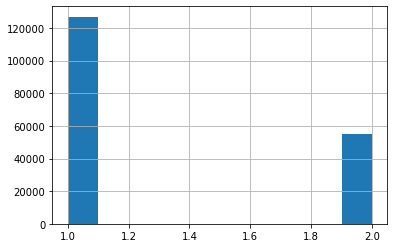

In [88]:
ml_df[target].hist()

Unbalanced data, with most of them being mapped to hte 1 

In [89]:
ml_df[target].unique()

array([2, 1], dtype=int64)

In [90]:
X_train

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,0,1,2,3,4,5,...,42,43,44,45,46,47,48,49,50,51
160881,6,0,0,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
187819,2,0,0,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
104178,3,0,0,2,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
104796,1,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
85023,2,0,0,2,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155930,8,0,0,5,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
182654,5,0,0,2,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
120007,2,0,0,2,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
178585,2,0,0,2,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [113]:
#models: Knn, SVM, Log reg, Decision Tree 

from sklearn.neighbors import KNeighborsClassifier
k = 5
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier()

In [93]:
Ks = 15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.64923977, 0.70823157, 0.69153079, 0.72821088, 0.70636126,
       0.73148943, 0.72854094, 0.73430589, 0.7301472 , 0.74092899,
       0.73701234, 0.74132506, 0.73905868, 0.74090699])

In [94]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [95]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train)

SVC()

In [96]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

C:\Users\sumai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01)

In [101]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=ea8296729ba633e61072f4091d058780ae2f8c7f771c908a1b58150d13d855a4
  Stored in directory: c:\users\sumai\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [107]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [108]:
test_y = y_test.values
test_y[0:5]

array([1, 1, 1, 2, 2], dtype=int64)

In [114]:
knn_yhat = kNN_model.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_score(test_y, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(test_y, knn_yhat, average='weighted') )

KNN Jaccard index: 0.67
KNN F1-score: 0.68


In [110]:
DT_yhat = DT_model.predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_score(test_y, DT_yhat))
print("DT F1-score: %.2f" % f1_score(test_y, DT_yhat, average='weighted') )

DT Jaccard index: 0.73
DT F1-score: 0.69


In [111]:
SVM_yhat = SVM_model.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_score(test_y, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(test_y, SVM_yhat, average='weighted') )

SVM Jaccard index: 0.74
SVM F1-score: 0.70


In [112]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_score(test_y, LR_yhat))
print("LR F1-score: %.2f" % f1_score(test_y, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(test_y, LR_yhat_prob))

LR Jaccard index: 0.73
LR F1-score: 0.70
LR LogLoss: 0.55
